In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size':20})
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
str_files = ''
#Carrega os dados do arquivo .csv
df = pd.read_csv(str_files + "cetesb_concatenado06semoutliers.csv",encoding='utf-8',sep=',')
trainingd = df
df

,ph,coliformes,dbo,fosforo,od,solido,temperatura,turbidez
0,6.415254,1.492010e+06,19.932203,0.725203,1.288983,291.305085,21.338983,62.362712
1,6.404952,1.587547e+06,19.122792,0.706433,1.355509,290.850631,21.371426,62.670960
2,6.393545,1.693320e+06,18.226659,0.685652,1.429162,290.347485,21.407346,63.012236
3,6.382507,1.795681e+06,17.359433,0.665542,1.500439,289.860570,21.442106,63.342502
4,6.371100,1.901455e+06,16.463299,0.644761,1.574092,289.357425,21.478026,63.683777
...,...,...,...,...,...,...,...,...
498,7.340000,8.115310e+05,41.025974,0.318414,0.420000,344.767399,21.761966,32.000000
499,7.370000,9.301910e+05,26.129870,0.546829,0.720000,336.690934,25.439754,34.939430
500,6.827000,1.045023e+06,11.714286,0.767875,2.256250,328.875000,24.075000,45.714286
501,6.920000,1.045023e+06,11.714286,0.767875,2.256250,328.875000,21.140164,45.714286


In [4]:
def pegar_dados_coluna_predita_train_test(trainingd,percent,index_coluna):
    data = trainingd.iloc[:,:].values
    train = trainingd.iloc[0:int(len(data)*percent),:].values  
    train_previsao = trainingd.iloc[0:int(len(data)*percent),index_coluna:index_coluna+1].values
    test = trainingd.iloc[len(train):,index_coluna:index_coluna+1].values
    
    return train,train_previsao, test

#Normalização dos dados: Normaliza os dados dentro um intervalo (0 a 1).
def normalizacao(train,test):
    sc = MinMaxScaler()
    testd = test
    train = sc.fit_transform(train)
    test = sc.fit_transform(test)    
    return train,test,testd

#Prepara o conjunto de dados em X e y, considerando a janela de visualização (lags).
#cy = coluna que será predita
def prepara_dados(dados,lags,cy):
    X = []
    y = []
    for i in range(lags, len(dados)):
        X.append(dados[i-lags:i,:])
        y.append(dados[i, cy])
       
    return np.array(X), np.array(y)

#Calcula o MAPE
#Define função para calcular o MAPE
#def mape(y_pred,y_true):
 #   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mape(y_pred,y_true):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    '''  
    mape_sum = 0
    for real,prediction in zip(y_true,y_pred):
        mape_sum += (abs((real - prediction))/real)
        
        print(real)
        mape = mape_sum/len(real)
    '''
    return mape

def rmse(y_pred,y_true):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

def r2(y_pred,y_true):
    rscore = r2_score(y_true,y_pred)
    return rscore

def rquadrado(y_pred,y_true):
    #Soma Total dos Quadrados (STQ): mostra a variação de y em torno da própria média. 
    #É o somatório das diferenças entre o valor alvo real e sua média elevado ao quadrado.
    y_traco = np.mean(y_true)
    
    print('media y_true:', y_traco)
        
    stq = 0
    
    for s in y_true:
        a = s - y_traco
        st = a * a
        stq = stq + st
    
    print('Soma Total dos Quadrados (STQ):', stq[0])
    
    #Soma dos Quadrados dos Resíduos (SQU): variação de Y que não é explicada pelo modelo elaborado. 
    #É o somatório das diferenças entre o valor predito e o valor real elevados ao quadrado.
    squ = 0
    
    y_traco = np.mean(y_pred)
    print('media y_pred:', y_traco)
    
    for n in range(len(y_true)):
        a = y_true[n] - y_pred[n]
        st = a * a
        squ = squ + st
        
    print('Soma dos Quadrados dos Resíduos (SQU):',squ[0])
    print('\n')
    print('Fórmula do R²')
    print('\n')
    print('sqr = stq - squ')
    sqr = stq[0] - squ[0]
    print('R² = sqr/stq')
    sqr = sqr/stq[0]
    print('\n')
    return sqr

def correlacao_determinacao(dtframe,tipo):
    
    if (tipo == 0): #Treino
        resultado = dtframe.corr().previsao_treino.values[1] ** 2 
    else: #teste
        resultado = dtframe.corr().previsao_teste.values[1] ** 2
    
    return resultado

def ajusta_array(array):
    lista = []
    
    for i in range(len(array)):
        lista.append(array[i][0])
        
    #print('ajusta array:',lista)
        
    return lista

def ajusta_lista(array):
    lista = []
    
    for i in range(len(array)):
        lista.append(array[i][0])
        
    #print('ajusta array:',lista)
        
    return lista


In [7]:
df_resultado_medio_g = pd.DataFrame()

index_coluna = 0

parametro = []

#média
media_parametro_mape_treino = []
media_parametro_rmse_treino = []
media_parametro_r_treino    = []
    
media_parametro_mape_teste  = []
media_parametro_rmse_teste  = []
media_parametro_r_teste     = []
    
#desvio_padrão
    
std_parametro_mape_treino = []
std_parametro_rmse_treino = []
std_parametro_r_treino    = []
    
std_parametro_mape_teste  = []
std_parametro_rmse_teste  = []
std_parametro_r_teste     = []

for p in ('ph','coliformes', 'dbo','fosforo','od','solido','temperatura','turbidez'):
    
    print('Agora é a vez do parâmetro:', p)

    df_resultados_treino = pd.DataFrame()
    df_resultados_teste  = pd.DataFrame()
    df_resultados        = pd.DataFrame()
    
    media_lag_mape_treino = []
    media_lag_rmse_treino = []
    media_lag_r_treino    = []
        
    media_lag_mape_teste = []
    media_lag_rmse_teste = []
    media_lag_r_teste    = []

    for l in range(1, 16):
    
        lags = l
    
        #seleciona os dados
    
        train,train_previsao, test = pegar_dados_coluna_predita_train_test(trainingd,0.70,index_coluna)
    
        #normalização dos dados
        train,test,testd = normalizacao(train,test)
        normalizador_previsao = MinMaxScaler()
        sc = MinMaxScaler()
        normalizador_previsao.fit_transform(train_previsao)
    
        #Prepara os dados de treinamento
        train_X, train_y = prepara_dados(train, lags,index_coluna)
        
        #Prepara os dados de teste
        entradas = trainingd[len(trainingd) - len(test) - lags:].values
        entradas = sc.fit_transform(entradas)   
    
        test_X = []
        for i in range(lags, lags+len(test)):
            test_X.append(entradas[i-lags:i, 0:8])
        test_X = np.array(test_X)
    
        #Ajusta a dimensão de test_X e train_X
        nsamples, nx, ny = test_X.shape
        test_X = test_X.reshape((nsamples,nx*ny))
    
        nsamples, nx, ny = train_X.shape
        train_X = train_X.reshape((nsamples,nx*ny))
    
        #Cria o modelo
        model = LinearRegression(normalize=True)
    
        #Treina o modelo
        model.fit(train_X,train_y)
        score = model.score(train_X,train_y)
        #print(score)

        #Dados de teste
        previsoes = model.predict(test_X)
        previsoes = previsoes.reshape(-1, 1)
        previsoes = normalizador_previsao.inverse_transform(previsoes)
        
        '''
        print('Teste - Gráficos com lag', l)
    
        #Plotagem do gráfico
        plt.plot(testd,color='red',label = 'Observado')
        plt.plot(previsoes,color='blue',label = 'Previsoes')
        plt.xlabel('Tempo')
        plt.ylabel('Valor pH')
        plt.legend()
        plt.show()
        '''
    
        #Dados de treino
        previsoes_treino = model.predict(train_X)
        previsoes_treino = previsoes_treino.reshape(-1, 1)
        previsoes_treino = normalizador_previsao.inverse_transform(previsoes_treino)
    
        '''
        print('Treinamento - Gráficos com lag', l)
    
        #Plotagem do gráfico
        plt.plot(train_previsao,color='red',label = 'Observado')
        plt.plot(previsoes_treino,color='blue',label = 'Previsoes')
        plt.xlabel('Tempo')
        plt.ylabel('Valor pH')
        plt.legend()
        plt.show()
        '''
            
        treino = train_previsao[lags: len(previsoes_treino) + lags, :]
        observado_test = testd
    
        observado_treino = train_previsao
    
        treino         = ajusta_array(treino)
        observado_test = ajusta_array(observado_test)
               
        #Calculo do erro da previsão MAPE, RMSE e R²
    
        observado_treino_d = observado_treino
        previsoes_treino_d = previsoes_treino
        previsoes_d        = previsoes
        
        mape_treino_d        = round(mape(previsoes_treino,treino),4)
        rmse_treino_d        = round(rmse(previsoes_treino,treino),4)
        #r_treino_d           = round(r2(previsoes_treino,treino),4)
        
        mape_teste_d        = round(mape(previsoes,observado_test),4)
        rmse_teste_d        = round(rmse(previsoes,observado_test),4)
        #r_teste_d           = round(r2(previsoes,observado_test),4) 
    
        #print('treino:',treino)
       
        df_corr_determinacao_treino = pd.DataFrame()
        df_corr_determinacao_teste  = pd.DataFrame()
    
        #print('previsao_treino:', previsoes_treino)
    
        #Calcula o coeficiente de determinação
        dict = {'previsao_treino': ajusta_lista(previsoes_treino), 'treino': treino} 
    
        df_treino = pd.DataFrame(dict)
        dframes_treino = [df_corr_determinacao_treino,df_treino]
        df_corr_determinacao_treino = pd.concat(dframes_treino)
    
        dict = {'previsao_teste': ajusta_lista(previsoes), 'teste': observado_test} 
    
        df_teste = pd.DataFrame(dict)
        dframes_teste = [df_corr_determinacao_teste,df_teste]
        df_corr_determinacao_teste = pd.concat(dframes_teste)
    
        r_treino_d = []
        r_teste_d  = []
    
        r_treino_d.append(round(correlacao_determinacao(df_corr_determinacao_treino,0),2))
        r_teste_d.append(round(correlacao_determinacao(df_corr_determinacao_teste,1),2))
        
        media_lag_mape_treino.append(np.mean(mape_treino_d))
        media_lag_rmse_treino.append(np.mean(rmse_treino_d))
        media_lag_r_treino.append(np.mean(r_treino_d))
        
        media_lag_mape_teste.append(np.mean(mape_teste_d))
        media_lag_rmse_teste.append(np.mean(rmse_teste_d))
        media_lag_r_teste.append(np.mean(r_teste_d))
        
    index_coluna = index_coluna + 1            
    #média
    media_parametro_mape_treino.append(np.mean(media_lag_mape_treino))
    media_parametro_rmse_treino.append(np.mean(media_lag_rmse_treino))
    media_parametro_r_treino.append(np.mean(media_lag_r_treino))
    
    media_parametro_mape_teste.append(np.mean(media_lag_mape_teste))
    media_parametro_rmse_teste.append(np.mean(media_lag_rmse_teste))
    media_parametro_r_teste.append(np.mean(media_lag_r_teste))
        
    #desvio_padrão
    
    std_parametro_mape_treino.append(np.std(media_lag_mape_treino))
    std_parametro_rmse_treino.append(np.std(media_lag_rmse_treino))
    std_parametro_r_treino.append(np.std(media_lag_r_treino))
    
    std_parametro_mape_teste.append(np.std(media_lag_mape_teste))
    std_parametro_rmse_teste.append(np.std(media_lag_rmse_teste))
    std_parametro_r_teste.append(np.std(media_lag_r_teste))
        
    parametro.append(p)
    
dict = {'parametro': parametro,
        'mape_treino':  media_parametro_mape_treino, 'std_mape_treino':  std_parametro_mape_treino, 
        'rmse_treino':  media_parametro_rmse_treino, 'std_rmse_treino':  std_parametro_rmse_treino,
        'r_quad_treino':media_parametro_r_treino,    'std_r_quad_treino':std_parametro_r_treino,
        'mape_teste':   media_parametro_mape_teste,  'std_mape_teste':   std_parametro_mape_teste, 
        'rmse_teste':   media_parametro_rmse_teste,  'std_rmse_teste':   std_parametro_rmse_teste,
        'r_quad_teste': media_parametro_r_teste,     'std_r_quad_teste': std_parametro_r_teste}
   
df_resultado_final = pd.DataFrame(dict)

dframes = [df_resultado_medio_g,df_resultado_final]
df_resultado_medio_g = pd.concat(dframes)

df_resultado_medio_g.round(2)

Agora é a vez do parâmetro: ph
Agora é a vez do parâmetro: coliformes
Agora é a vez do parâmetro: dbo
Agora é a vez do parâmetro: fosforo
Agora é a vez do parâmetro: od
Agora é a vez do parâmetro: solido
Agora é a vez do parâmetro: temperatura
Agora é a vez do parâmetro: turbidez


,parametro,mape_treino,std_mape_treino,rmse_treino,std_rmse_treino,r_quad_treino,std_r_quad_treino,mape_teste,std_mape_teste,rmse_teste,std_rmse_teste,r_quad_teste,std_r_quad_teste
0,ph,4.66,0.06,0.19,0.01,0.61,0.06,5.48,0.20,0.43,0.02,0.16,0.03
1,coliformes,162005.42,1842.96,841598.30,69538.48,0.43,0.10,1893991.94,99435.83,1223960.95,76808.74,0.03,0.02
2,dbo,106.67,2.24,9.98,0.59,0.44,0.07,47.57,2.37,14.26,1.52,0.11,0.06
3,fosforo,129.98,3.07,0.43,0.03,0.38,0.08,114.62,3.86,0.54,0.07,0.03,0.02
4,od,169.83,3.57,0.83,0.05,0.32,0.09,89.04,8.05,0.93,0.15,0.07,0.05
5,solido,46.86,1.26,64.84,4.83,0.51,0.08,23.93,2.44,81.97,9.32,0.11,0.03
6,temperatura,7.02,0.32,1.32,0.09,0.35,0.10,7.66,0.49,1.82,0.13,0.08,0.02
7,turbidez,69.12,0.28,10.44,0.87,0.45,0.05,38.79,2.97,15.89,1.54,0.02,0.01


In [8]:
df_resultados.describe()

,lags_treino,mape_treino,rmse_treino,r_quad_treino,lags_teste,mape_teste,rmse_teste,r_quad_teste
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,10.50000,4.679985,0.180085,0.639075,10.50000,5.564540,0.443445,0.142085
std,5.91608,0.064456,0.020181,0.075069,5.91608,0.235052,0.024362,0.046020
min,1.00000,4.552200,0.148700,0.510400,1.00000,5.198400,0.407900,0.059100
25%,5.75000,4.630725,0.162525,0.577400,5.75000,5.350875,0.420700,0.110975
50%,10.50000,4.709750,0.178700,0.649750,10.50000,5.669650,0.450200,0.145400
75%,15.25000,4.718400,0.197125,0.703425,15.25000,5.731075,0.462275,0.178900
max,20.00000,4.779400,0.212400,0.751800,20.00000,5.981800,0.481900,0.210200


In [9]:
df_resultados_treino = pd.DataFrame()
df_resultados_teste = pd.DataFrame()
df_resultados = pd.DataFrame()

#lags = (3,5,7) 
#for l in range(1, 9, 2):
for l in range(1, 21):
    
    lags = l
    
    #seleciona os dados
    
    train,train_previsao, test = pegar_dados_coluna_predita_train_test(trainingd,0.70,4)
    
    #normalização dos dados
    train,test,testd = normalizacao(train,test)
    normalizador_previsao = MinMaxScaler()
    sc = MinMaxScaler()
    normalizador_previsao.fit_transform(train_previsao)
    
    #Prepara os dados de treinamento
    #Vai predizer o valor da coluna 4 (valor ph)
    train_X, train_y = prepara_dados(train, lags,4)
        
    #Prepara os dados de teste
    entradas = trainingd[len(trainingd) - len(test) - lags:].values
    entradas = sc.fit_transform(entradas)   
    
    test_X = []
    for i in range(lags, lags+len(test)):
        test_X.append(entradas[i-lags:i, 0:8])
    test_X = np.array(test_X)
    
    #Ajusta a dimensão de test_X e train_X
    nsamples, nx, ny = test_X.shape
    test_X = test_X.reshape((nsamples,nx*ny))
    
    nsamples, nx, ny = train_X.shape
    train_X = train_X.reshape((nsamples,nx*ny))
    
    #Cria o modelo
    model = LinearRegression(normalize=True)
    
    #Treina o modelo
    model.fit(train_X,train_y)
    score = model.score(train_X,train_y)
    #print(score)

    #Dados de teste
    previsoes = model.predict(test_X)
    previsoes = previsoes.reshape(-1, 1)
    previsoes = normalizador_previsao.inverse_transform(previsoes)
       
    print('Teste - Gráficos com lag', l)
    '''
    #Plotagem do gráfico
    plt.plot(testd,color='red',label = 'Observado')
    plt.plot(previsoes,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    '''
    
    
    #Dados de treino
    previsoes_treino = model.predict(train_X)
    previsoes_treino = previsoes_treino.reshape(-1, 1)
    previsoes_treino = normalizador_previsao.inverse_transform(previsoes_treino)
    
    
    print('Treinamento - Gráficos com lag', l)
    '''
    #Plotagem do gráfico
    plt.plot(train_previsao,color='red',label = 'Observado')
    plt.plot(previsoes_treino,color='blue',label = 'Previsoes')
    plt.xlabel('Tempo')
    plt.ylabel('Valor pH')
    plt.legend()
    plt.show()
    '''
            
    treino = train_previsao[lags: len(previsoes_treino) + lags, :]
    observado_test = testd
    
    observado_treino = train_previsao
    
    treino         = ajusta_array(treino)
    observado_test = ajusta_array(observado_test)
               
    #Calculo do erro da previsão MAPE, RMSE e R²
    
    observado_treino_d = observado_treino
    previsoes_treino_d = previsoes_treino
    previsoes_d        = previsoes
        
    mape_treino_d        = round(mape(previsoes_treino,treino),4)
    rmse_treino_d        = round(rmse(previsoes_treino,treino),4)
    #r_treino_d           = round(r2(previsoes_treino,treino),4)
        
    mape_teste_d        = round(mape(previsoes,observado_test),4)
    rmse_teste_d        = round(rmse(previsoes,observado_test),4)
    #r_teste_d           = round(r2(previsoes,observado_test),4) 
    
    #print('treino:',treino)
       
    df_corr_determinacao_treino = pd.DataFrame()
    df_corr_determinacao_teste  = pd.DataFrame()
    
    #print('previsao_treino:', previsoes_treino)
    
    #Calcula o coeficiente de determinação
    dict = {'previsao_treino': ajusta_lista(previsoes_treino), 'treino': treino} 
    
    df_treino = pd.DataFrame(dict)
    dframes_treino = [df_corr_determinacao_treino,df_treino]
    df_corr_determinacao_treino = pd.concat(dframes_treino)
    
    dict = {'previsao_teste': ajusta_lista(previsoes), 'teste': observado_test} 
    
    df_teste = pd.DataFrame(dict)
    dframes_teste = [df_corr_determinacao_teste,df_teste]
    df_corr_determinacao_teste = pd.concat(dframes_teste)
    
    r_treino_d = []
    r_teste_d  = []
    
    r_treino_d.append(round(correlacao_determinacao(df_corr_determinacao_treino,0),4))
    r_teste_d.append(round(correlacao_determinacao(df_corr_determinacao_teste,1),4))
    
    lag_treino = []
    lag_teste = []
    
    lag_treino.append(lags)
    lag_teste.append(lags)
        
    # dictionary of lists  
    
    dict = {'lags_treino': lag_treino, 'mape_treino': mape_treino_d, 'rmse_treino': rmse_treino_d,'r_quad_treino':r_treino_d,
            'lags_teste': lag_teste, 'mape_teste': mape_teste_d, 'rmse_teste': rmse_teste_d,'r_quad_teste':r_teste_d} 
    
    df_result = pd.DataFrame(dict)
    dframes = [df_resultados,df_result]
    df_resultados = pd.concat(dframes)   


Teste - Gráficos com lag 1
Treinamento - Gráficos com lag 1
Teste - Gráficos com lag 2
Treinamento - Gráficos com lag 2
Teste - Gráficos com lag 3
Treinamento - Gráficos com lag 3
Teste - Gráficos com lag 4
Treinamento - Gráficos com lag 4
Teste - Gráficos com lag 5
Treinamento - Gráficos com lag 5
Teste - Gráficos com lag 6
Treinamento - Gráficos com lag 6
Teste - Gráficos com lag 7
Treinamento - Gráficos com lag 7
Teste - Gráficos com lag 8
Treinamento - Gráficos com lag 8
Teste - Gráficos com lag 9
Treinamento - Gráficos com lag 9
Teste - Gráficos com lag 10
Treinamento - Gráficos com lag 10
Teste - Gráficos com lag 11
Treinamento - Gráficos com lag 11
Teste - Gráficos com lag 12
Treinamento - Gráficos com lag 12
Teste - Gráficos com lag 13
Treinamento - Gráficos com lag 13
Teste - Gráficos com lag 14
Treinamento - Gráficos com lag 14
Teste - Gráficos com lag 15
Treinamento - Gráficos com lag 15
Teste - Gráficos com lag 16
Treinamento - Gráficos com lag 16
Teste - Gráficos com lag 1

In [10]:
df_resultados.describe()

,lags_treino,mape_treino,rmse_treino,r_quad_treino,lags_teste,mape_teste,rmse_teste,r_quad_teste
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,10.50000,171.814130,0.792760,0.376610,10.50000,93.766475,1.028915,0.053010
std,5.91608,4.758783,0.074909,0.123684,5.91608,11.193954,0.223601,0.049251
min,1.00000,163.887100,0.664800,0.179800,1.00000,76.594100,0.722000,0.009000
25%,5.75000,168.038900,0.725450,0.278300,5.75000,84.996250,0.836800,0.016825
50%,10.50000,171.832750,0.806350,0.362950,10.50000,92.633300,1.003050,0.022450
75%,15.25000,175.873225,0.852525,0.490250,15.25000,103.108375,1.212975,0.077725
max,20.00000,179.017000,0.904300,0.573600,20.00000,114.934400,1.436300,0.161200


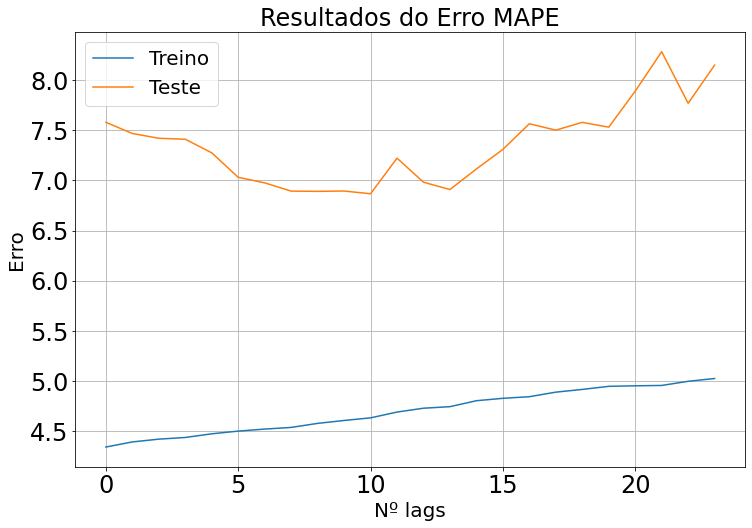

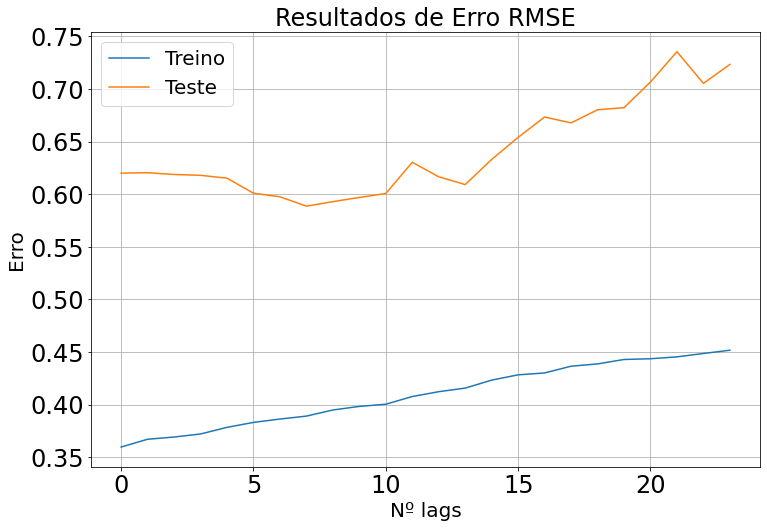

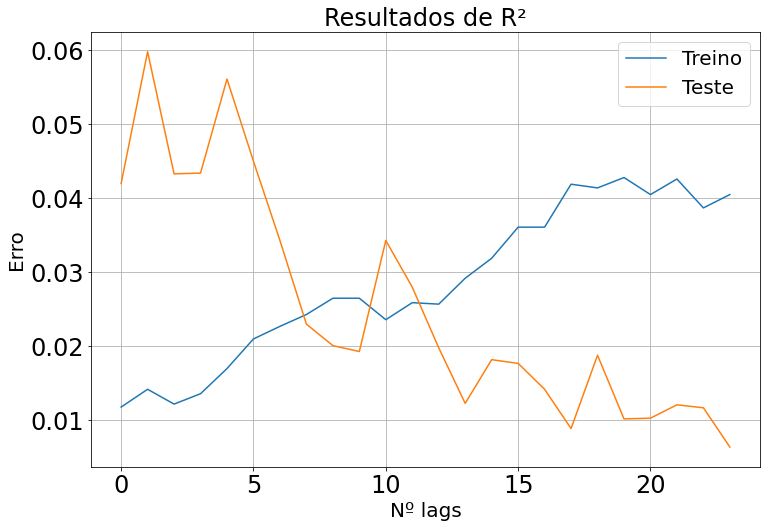

In [12]:
plt.plot(df_resultados.mape_treino.values,label = 'Treino')
plt.plot(df_resultados.mape_teste.values,label  = 'Teste')
plt.xlabel('Nº lags')
plt.ylabel('Erro')
plt.title('Resultados do Erro MAPE')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_resultados.rmse_treino.values,label = 'Treino')
plt.plot(df_resultados.rmse_teste.values,label  = 'Teste')
plt.xlabel('Nº lags')
plt.ylabel('Erro')
plt.title('Resultados de Erro RMSE')
plt.legend()
plt.grid()
plt.show()

plt.plot(df_resultados.r_quad_treino.values,label = 'Treino')
plt.plot(df_resultados.r_quad_teste.values,label  = 'Teste')
plt.xlabel('Nº lags')
plt.ylabel('Erro')
plt.title('Resultados de R²')
plt.legend()
plt.grid()
plt.show()